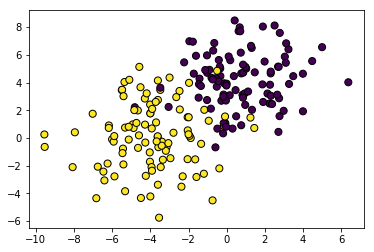

In [5]:
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt
%matplotlib inline

X, y = make_blobs(n_samples=200,
                             n_features=2, # 2 dementions
                             centers=2, #クラスタ中心2個
                             cluster_std=2, #クラスタの大きさ（標準偏差）
                             random_state=3 # 乱数種（再現用）
                         )
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, edgecolors='k');

In [12]:
from sklearn.svm import SVC
import numpy as np
clf = SVC(kernel='rbf')

In [14]:
def plotSVMBoundary(X, clf, mesh=True, boundary=True):
    colors = ['k'] * 3
    linestyles = ['-'] * 3
    levels = [-1, 0, 1]
    
    plt.scatter(clf.support_vectors_[:, 0], 
                clf.support_vectors_[:, 1],
                s=80, facecolors='none', edgecolors='k')
    
    # plot range
    x_min = min(X[:,0])
    x_max = max(X[:,0])
    y_min = min(X[:,1])
    y_max = max(X[:,1])
    
    XX, YY = np.mgrid[x_min:x_max:200j, y_min:y_max:200j] # make a grid
    Z = clf.decision_function(np.c_[XX.ravel(), YY.ravel()])
    Z = Z.reshape(XX.shape)
    
    if mesh:
        plt.pcolormesh(XX, YY, Z > 0, cmap=plt.cm.Paired, zorder=-10)
    if boundary:
        plt.contour(XX, YY, Z,
                       colors=colors,
                       linestyles=linestyles,
                       levels=levels)  # draw lines (level=0:boundary, level=+-1:margine lines)
    
    plt.xlim(x_min, x_max)
    plt.ylim(y_min, y_max)

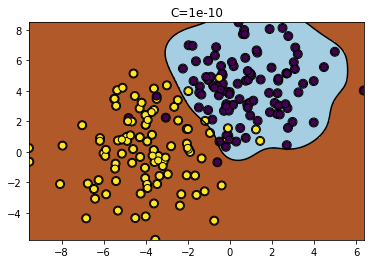

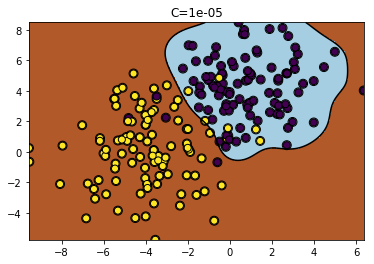

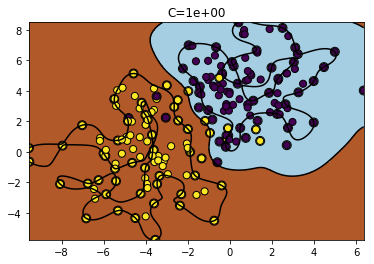

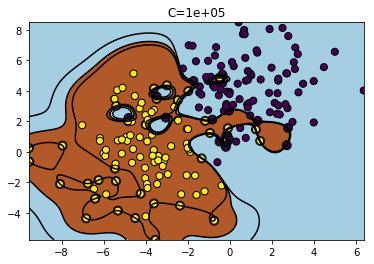

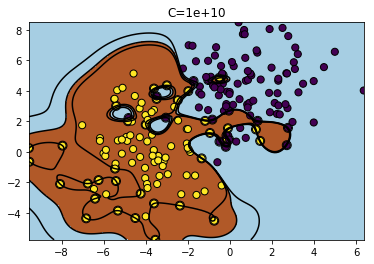

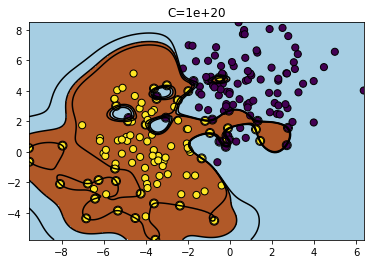

In [15]:
from sklearn.svm import SVC

clf = SVC()
clf.kernel = 'rbf'
    
for C in [1e-10, 1e-5, 1, 1e5, 1e10, 1e20]:
   
    clf.C = C
    clf.fit(X,y)
    plotSVMBoundary(X, clf, mesh=True)
    plt.scatter(X[:, 0], X[:, 1], marker='o', s=50, c=y, edgecolors='k')
    plt.title("C={0:.0e}".format(C))
    
    plt.show()

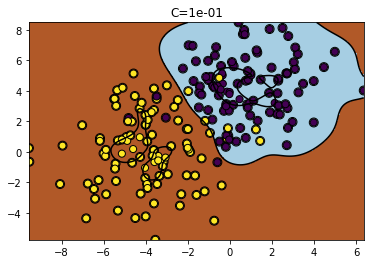

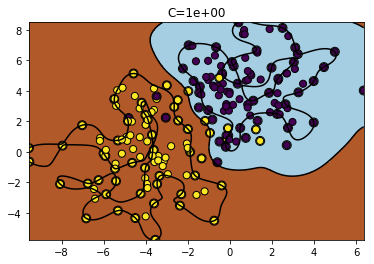

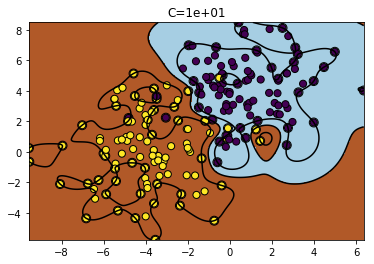

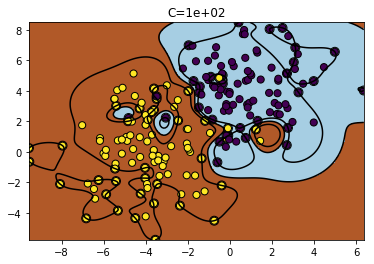

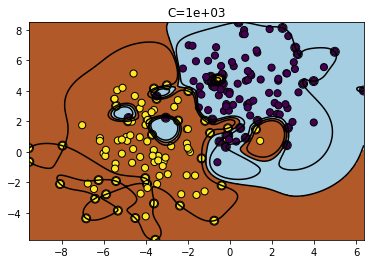

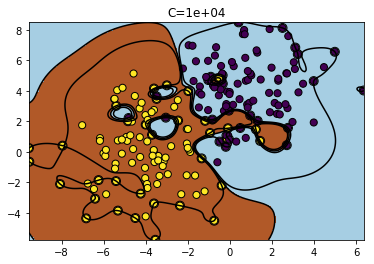

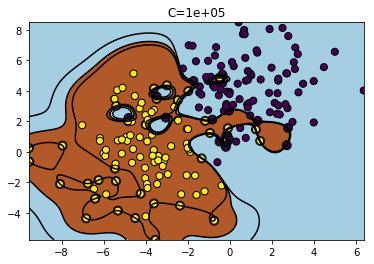

In [16]:
from sklearn.svm import SVC

clf = SVC()
clf.kernel = 'rbf'
    
for C in 10 ** np.arange(-1.0, 6.0):
   
    clf.C = C
    clf.fit(X,y)
    plotSVMBoundary(X, clf, mesh=True)
    plt.scatter(X[:, 0], X[:, 1], marker='o', s=50, c=y, edgecolors='k')
    plt.title("C={0:.0e}".format(C))
    
    plt.show()

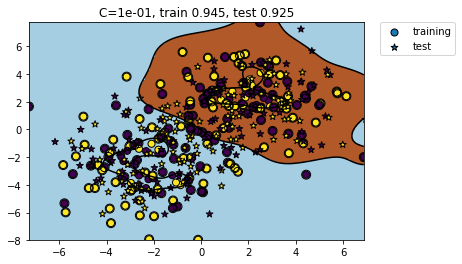

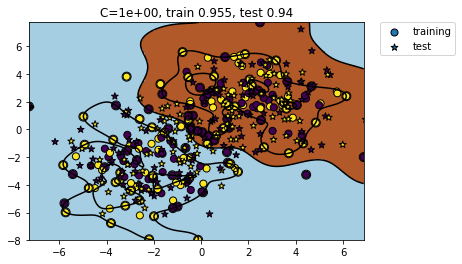

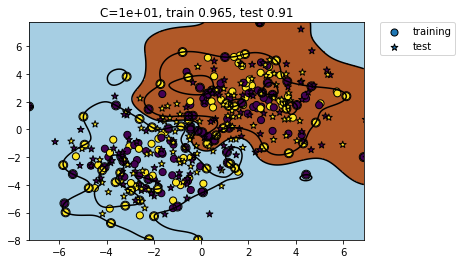

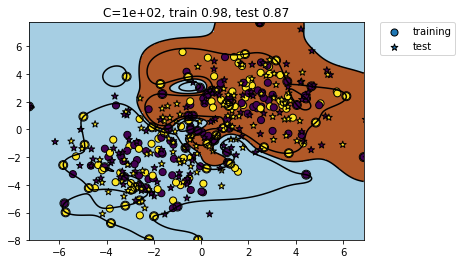

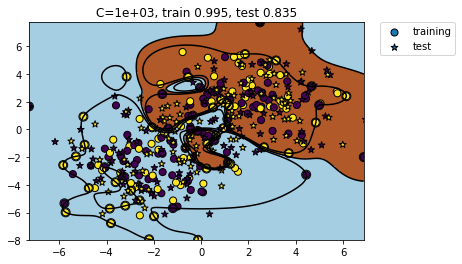

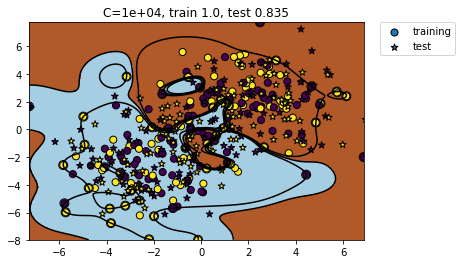

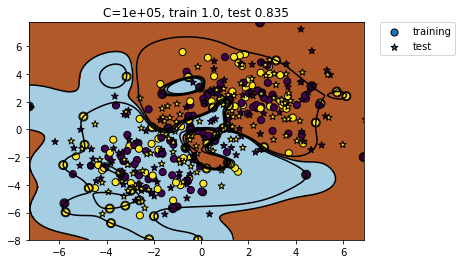

In [17]:
from sklearn.svm import SVC

clf = SVC()
clf.kernel = 'rbf'

# 今回は、Training用のデータとTest用のデータはランダムに別々のものを用意する

X_train, y_train = make_blobs(n_samples=200, # 20個生成
              n_features=2, # 2次元
              centers=[(-2, -2), (2, 2)],    # クラスタ中心2個
              cluster_std=2, # クラスタの大きさ（標準偏差）
             )

X_test, y_test = make_blobs(n_samples=200, # 20個生成
      n_features=2, # 2次元
      centers=[(-2, -2), (2, 2)],    # クラスタ中心2個
      cluster_std=2, # クラスタの大きさ（標準偏差）
     )


for C in 10 ** np.arange(-1.0, 6.0):
   
    clf.C = C
    
    plt.scatter(X_train[:, 0], X_train[:, 1], marker='o', s=50, c=y, label="training", edgecolors='k')

    clf.fit(X_train, y_train)
    train_score = clf.score(X_train, y_train)

    plotSVMBoundary(X_train, clf, mesh=True)
    
    plt.scatter(X_test[:, 0], X_test[:, 1], marker='*', s=50, c=y, label="test", edgecolors='k')

    test_score = clf.score(X_test, y_test)
    
    plt.title("C={0:.0e}, train {1}, test {2}".format(C, train_score, test_score))

    plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
    
    plt.show()